In [1]:
## Test quadprog
#import daqp
import numpy as np
from math import comb
from ctypes import * 
import ctypes.util
import plotly.graph_objs as go
from collections import defaultdict
from plotly.offline import iplot
import itertools
from qpsolvers import solve_qp
from tqdm import tqdm
import qpsolvers
import gudhi
import matplotlib.pyplot as plot
from numpy import genfromtxt
import math
from scipy.sparse.csgraph import laplacian
from scipy.sparse.csgraph import connected_components

from DensiTDA import alphatools 

In [2]:
V = np.array(genfromtxt('confland2.csv', delimiter=','))
n = len(V)

In [3]:
len(V)

20232

In [4]:
P = np.zeros((n,1))
S = V #100*V
alpha = 0.35**2
D = 6

In [5]:
#Y_skel, Y = alphatools.compute_weighted_cech_graph(S, P, alpha)

In [6]:
#connected_components(Y)

In [7]:
my_alpha_complex = alphatools.compute_alpha_complex(S, P, alpha, D)

Generating 1-Dimensional Weighted Cech Complex


100%|█████████████████████████████████████| 20232/20232 [11:34<00:00, 29.13it/s]


	Total Edges of Cech Graph:  458184
	Highest Degree of Cech Graph:  81
Begin Computing Alpha Complex
Preprocessing Dual Matrices:  20232


100%|███████████████████████████████████████████| 21/21 [05:34<00:00, 15.91s/it]


*********** BEGIN DIMENSION 0 ***********
	Possible Facets:  20232


100%|██████████████████████████████████| 20232/20232 [00:01<00:00, 14491.91it/s]


	Final Number of Facets:  20232
*********** BEGIN DIMENSION 1 ***********
	Possible Facets:  458184


100%|████████████████████████████████| 458184/458184 [00:15<00:00, 29326.74it/s]


	Final Number of Facets:  228077
*********** BEGIN DIMENSION 2 ***********
Estimating Number of Facets for dimension  2
	Possible Facets:  691322


100%|████████████████████████████████| 691322/691322 [00:24<00:00, 28022.56it/s]


	Final Number of Facets:  608933
*********** BEGIN DIMENSION 3 ***********
Estimating Number of Facets for dimension  3
	Possible Facets:  4625888


100%|██████████████████████████████| 4625888/4625888 [02:41<00:00, 28620.87it/s]


	Final Number of Facets:  665208
*********** BEGIN DIMENSION 4 ***********
Estimating Number of Facets for dimension  4
	Possible Facets:  1426440


100%|██████████████████████████████| 1426440/1426440 [00:50<00:00, 28011.02it/s]


	Final Number of Facets:  345888
*********** BEGIN DIMENSION 5 ***********
Estimating Number of Facets for dimension  5
	Possible Facets:  272544


100%|████████████████████████████████| 272544/272544 [00:09<00:00, 27259.04it/s]


	Final Number of Facets:  92040
*********** BEGIN DIMENSION 6 ***********
Estimating Number of Facets for dimension  6
	Possible Facets:  23952


100%|██████████████████████████████████| 23952/23952 [00:00<00:00, 26470.62it/s]


	Final Number of Facets:  10272


In [ ]:
# In the paper, it has (20232, 228072, 608928, 665208, 345888, 92040, 10272)

In [8]:
filtration = []
for d in range(D + 1):
    filtration += my_alpha_complex[d]

In [9]:
example2 = gudhi.SimplexTree()
for d in range(D + 1):
    for facet, val in my_alpha_complex[d]:
        example2.insert(facet, filtration=val)
        
my_persistence = example2.persistence(homology_coeff_field = 2)

/var/folders/tr/3zw9td7531z0_hhwc8105rv00000gn/T/ipykernel_41194/2366749736.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [17]:
betti_numbers = {}
for i in range(D):
    betti_numbers[i] = 0
for bar, bd in my_persistence:
    if bd[1] > 10000: 
        betti_numbers[bar] += 1

In [18]:
betti_numbers

{0: 1, 1: 9, 2: 14, 3: 6, 4: 0, 5: 0}

/opt/anaconda3/envs/densitda/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning:

This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.

/opt/anaconda3/envs/densitda/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:85: UserWarning:

There are 376240 intervals given as input, whereas max_intervals is set to 20000.



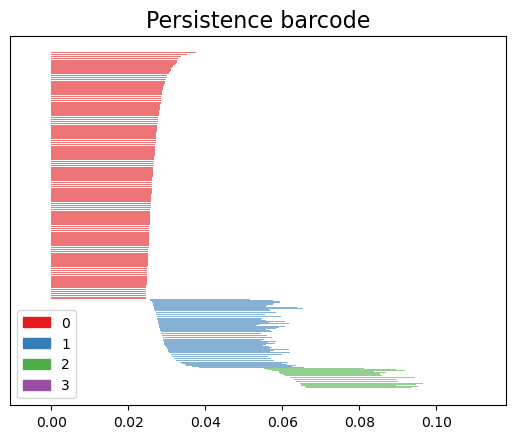

In [11]:
gudhi.plot_persistence_barcode(my_persistence, legend=True)
plot.show()

# gudhi.plot_persistence_diagram(my_persistence, legend=True)
# plot.show()

# gudhi.plot_persistence_density(my_persistence, legend=True)
# plot.show()

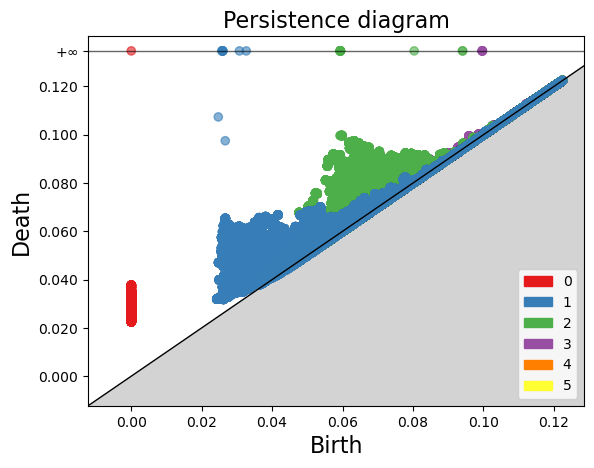

In [12]:
gudhi.plot_persistence_diagram(my_persistence, legend=True)
plot.show()